In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

In [2]:
Nx, Ny = 100, 50
et = 10.0

def load(Nx,Ny,et):
    base_fn = 'output_rising_bubble'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,et)

# RMSE probe plotter

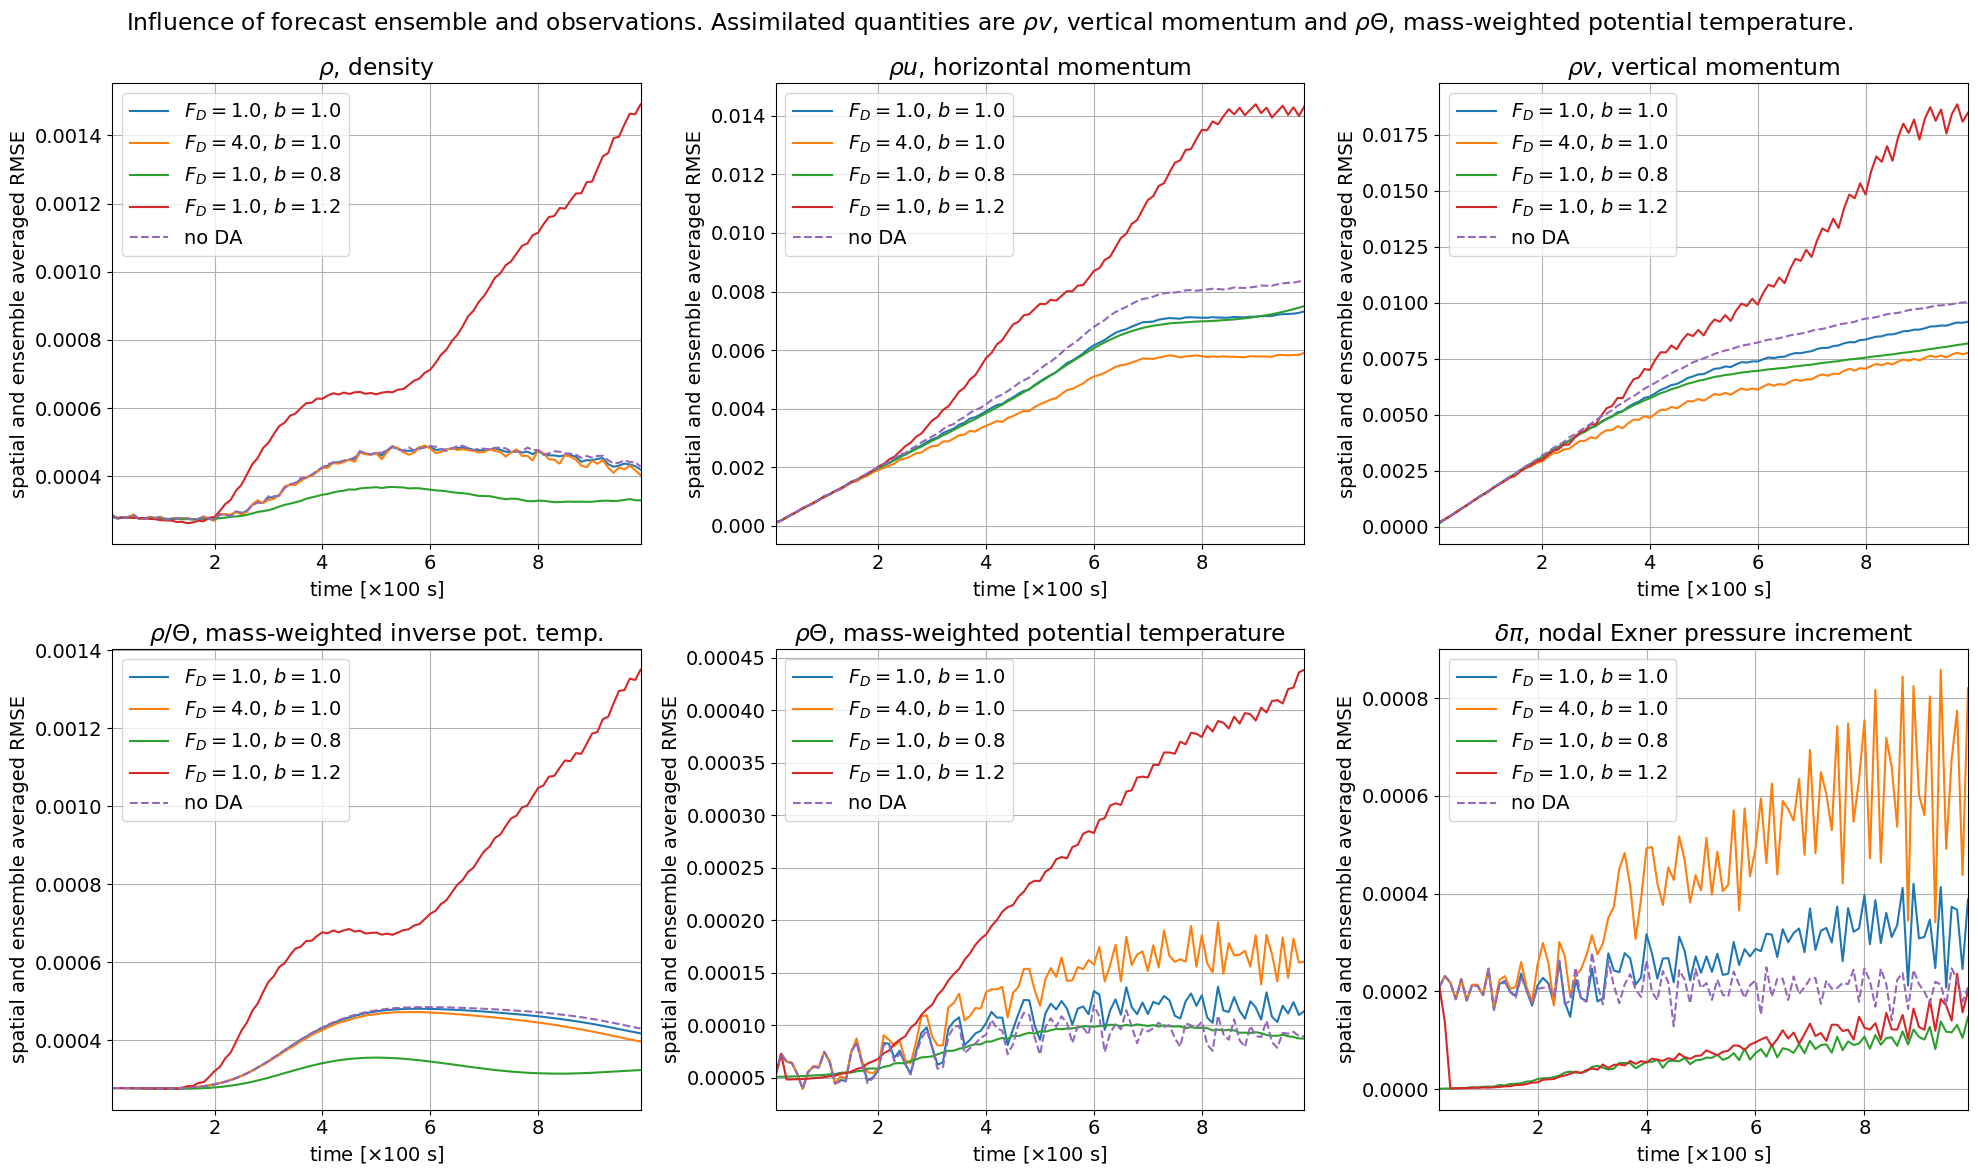

In [288]:
attributes = ['rho','rhou','rhov','rhoX','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

plt.style.use('default')

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.0,0.1)[1:]

probe_idx = [20,40]
Xext = np.arange(-10.0,10.01,0.2)
Yext = np.arange(0.0,10.02,0.2)
probe_loc = [Xext[probe_idx[0]], Yext[probe_idx[1]]]

fn = 'effects_obs_covar_ensemble_spread'
title = 'Influence of forecast ensemble and observations'

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()
attr_shorts = pt.short_labels()

# rmse_type = 'probe'
rmse_type = 'spatial'

def get_ens(sfx,diff):
    return tc.get_ensemble(times, 10, attribute, sfx, label_type='TIME', avg=True, diff=diff)

for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    
    ens_noda_suffix = 'noda'
    ens_noda_label = 'no DA'
    ens_noda = get_ens(ens_noda_suffix, diff)
    
    ens_1_suffix = 'obs_psinc_wdawloc_1.0_rhov_rhoY'
    ens_1_label = r'$F_D=$%.1f, $b=$%.1f' %(1.0,1.0)
    
    ens_2_suffix = 'obs_psinc_wdawloc_4.0_rhov_rhoY'
    ens_2_label = r'$F_D=$%.1f, $b=$%.1f' %(4.0,1.0)

    ens_3_suffix = 'obs_psinc_wdawloc_1.0_rhov_rhoY_inflation_0.8'
    ens_3_label = r'$F_D=$%.1f, $b=$%.1f' %(1.0,0.8)
    
    ens_4_suffix = 'obs_psinc_wdawloc_1.0_rho_rhov_inflation_1.2'
    ens_4_suffix = tc.cb_suffix(1,0, '%s' %(ens_4_suffix))
    ens_4_label = r'$F_D=$%.1f, $b=$%.1f' %(1.0,1.2)

    ens_1 = get_ens(ens_1_suffix, diff)
    ens_2 = get_ens(ens_2_suffix, diff)
    ens_3 = get_ens(ens_3_suffix, diff)
    ens_4 = get_ens(ens_4_suffix, diff)
    
    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_ref', label_type='TIME',avg=True, diff=diff)

    ax = pl.get_ax(i)
    
    avg = False

    if rmse_type == 'probe':
        diff_noda = tc.probe_rmse(ens_noda, psinc, probe_idx, avg=avg)
        diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_idx, avg=avg)
        diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_idx, avg=avg)
        diff_ens_3 = tc.probe_rmse(ens_3, psinc, probe_idx, avg=avg)
        diff_ens_4 = tc.probe_rmse(ens_4, psinc, probe_idx, avg=avg)
        ax.set_ylabel('ensemble averaged RMSE at probe location')
        plt.suptitle("%s. Assimilated quantities are %s and %s. Probe location is [%.1f km,%.1f km]." %(title,attr_labels['rho'], attr_labels['rhov'], probe_loc[0], probe_loc[1]))
        
    elif rmse_type == 'spatial':
        diff_noda = tc.spatially_averaged_rmse(ens_noda,psinc,avg=avg)
        diff_ens_1 = tc.spatially_averaged_rmse(ens_1,psinc,avg=avg)
        diff_ens_2 = tc.spatially_averaged_rmse(ens_2,psinc,avg=avg)
        diff_ens_3 = tc.spatially_averaged_rmse(ens_3,psinc,avg=avg)
        diff_ens_4 = tc.spatially_averaged_rmse(ens_4,psinc,avg=avg)
        ax.set_ylabel('spatial and ensemble averaged RMSE')
        plt.suptitle("%s. Assimilated quantities are %s and %s." %(title,attr_labels['rhov'], attr_labels['rhoY']))
#         plt.suptitle("%s. Assimilated quatities are listed in the legends." %(title))
    
    if diff == True: times = times[1:]
    ax.plot(times,diff_ens_1, label=ens_1_label)
    ax.plot(times,diff_ens_2, label=ens_2_label)
    ax.plot(times,diff_ens_3, label=ens_3_label)
    ax.plot(times,diff_ens_4, label=ens_4_label)
    ax.plot(times,diff_noda, '--', label=ens_noda_label)

    ax.set_title("%s" %attr_labels[attribute])
    ax.set_xlim([times[0],times[-1]])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))

plt.tight_layout(rect=[0, 0.0, 1, 0.96])
# plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()

# Ensemble plotter

obs_psinc_wdawloc_1.0_rho_rhov_inflation_1.2_cont_blend_fs=1_ts=0
10
(100, 50)
10


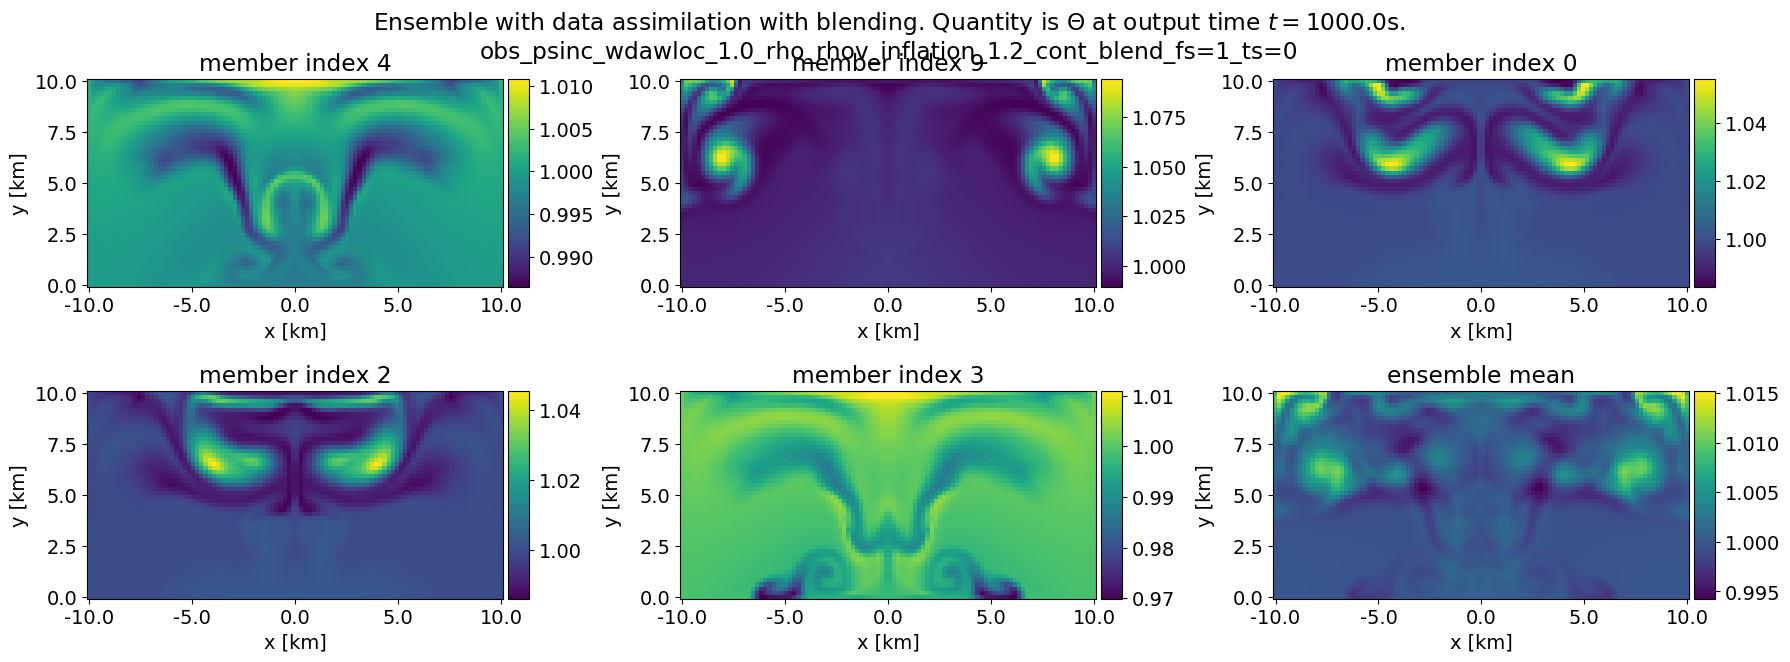

In [287]:
import random

random.seed(444)

N = 10
FD = 1.0
# FD = 4.0
blend = True
# blend = False

obs = 'psinc'
# obs = 'truthgen'
# obs = 'truthgen_freezelt5'
sfx = 'obs_%s_wdawloc_1.0_rho_rhov_inflation_1.2' %(obs)
# sfx = 'obs_%s_wdawloc_1.0_rhov_rhoY_inflation_0.8' %(obs)
# sfx = 'ib_obs_comp_wdawloc_%.1f' %FD

# sfx = 'noda'
if blend==True: sfx = tc.cb_suffix(1,0, '%s' %(sfx))
bld_tag = 'with blending' if blend==True else 'without blending'
print(sfx)
attribute = 'p2_nodes'
times = [10.0]

attributes = ['rhoY', 'rho']
take_diff = False

class oo(object):
    def __init__(self):
        None
        
oo_arr = oo()

for attr in attributes:
    ens = tc.get_ensemble(times, N, attr, sfx)[0]
    setattr(oo,attr,ens)
    N = ens.shape[0]
    
print(N)

ens1 = getattr(oo,attributes[0])
ens0 = getattr(oo,attributes[1])
ens = []
for nn in range(N):
    mem = ens1[nn] / ens0[nn]
    ens.append(mem)
    
ens = np.array(ens)
mean = ens.mean(axis=0)
print(np.array(mean).shape)

if 'noda' in sfx:
    noda = oo()
elif '1.2' in sfx:
    b12 = oo()
elif '0.8' in sfx:
    b08 = oo()

if 'noda' in sfx:
    setattr(noda,'mean',mean.T)
elif '4.0' in sfx:
    l40 = oo()
    setattr(l40,'mean',mean.T)
elif '1.2' in sfx:
    setattr(b12,'mean',mean.T)
elif '0.8' in sfx:
    setattr(b08,'mean',mean.T)
    
mean = [mean.T,'ensemble mean']

attr_labels = pt.labels()
ncolslen = int((ens.shape)[0]/1)
print(ncolslen)
fs = (18,3)
fs = (18,7)

arr_lst = [[arr.T,'member index %i' %n] for n,arr in enumerate(ens)]
arr_lst = random.sample(arr_lst, k=5)
arr_lst.append(mean)
ncolslen = int(len(arr_lst)/2)
#     print(ncolslen)

if take_diff == True:
    for k,arr in enumerate(arr_lst):
        if 'noda' in sfx:
            print(k)
            setattr(noda,str(k),arr[0]) 
        else:
            arr_lst[k][0] = arr[0] - getattr(noda,str(k))
#                 arr_lst[k][0] = arr[0] - psinc[-1].T

pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)

x_axs = np.arange(-10.0,15.0,5.0)
y_axs = np.arange(0,12.5,2.5)
x_loc = np.linspace(0,Nx-1,len(x_axs))
y_loc = np.linspace(0,Ny-1,len(y_axs))
x_label = r'x [km]'
y_label = r'y [km]'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)

if 'noda' in sfx and take_diff == False:
    st = 'Ensemble with no data assimilation. Quantity is $\Theta$ at output time $t=$%.1fs.\n%s' %(times[-1]*100, sfx)
elif take_diff == True:
    st = '%s - noda' %sfx
else:
#         st = "Ensemble with $F_D=$%.1f %s. Quantity is %s at output time $t=$%.1fs." %(FD, bld_tag, attr_labels[attribute],times[-1]*100)
    st = "Ensemble with data assimilation %s. Quantity is $\Theta$ at output time $t=$%.1fs.\n%s" %(bld_tag, times[-1]*100, sfx)
_ = pl.plot(aspect='equal',method='imshow',suptitle=st)
# _ = pl.plot(aspect='equal',method='imshow')

if take_diff == True:
    pl.save_fig('../img/diff_%s_%.2f' %(sfx,times[0]), format='.pdf')
else:
    pl.save_fig('../img/%s_%.2f' %(sfx,times[0]), format='.pdf')

In [253]:
N = 1
sfx = 'comp_ref'
# sfx = 'cold_psinc_ref'
sfx = 'psinc_ref'
sfx = 'ip_ref'
# sfx = 'truthgen'

fn = tc.get_filename(N,sfx)
path = tc.get_path(fn)

attributes = ['rho','rhou','rhow','vorty','rhoY','p2_nodes']
attributes = ['rhoY', 'rho']
# attributes = ['p2_nodes']

times = [0.0,5.0,7.5,10.0]
ltags = ['ic',tags[9],tags[9],tags[9]]
times = [0.05,5.0,7.5,10.0]
times = [5.0]
ltags = [tags[9],tags[9],tags[9],tags[9]]
# times = [0.0]

ldicts = pt.labels()

t_lbl = 'TIME'
arr_lst = []

class oo(object):
    def __init__(self):
        None
        
oo = oo()

for tt,time in enumerate(times):
    tag = ltags[tt]
    for atr_idx, attribute in enumerate(attributes):
        arr = tc.get_arr(path, time, N, attribute, label_type=t_lbl, tag=tag, inner=True, avg=False)[0]
        arr = arr.T
        
        setattr(oo,attribute,arr)
        
    Y = oo.rhoY / oo.rho
    arr_lst.append([Y,"time = %.1fs" %(time*100)])
    setattr(oo,'Y',oo.rhoY / oo.rho)

In [215]:
print(oo.Y.min())

0.99966025


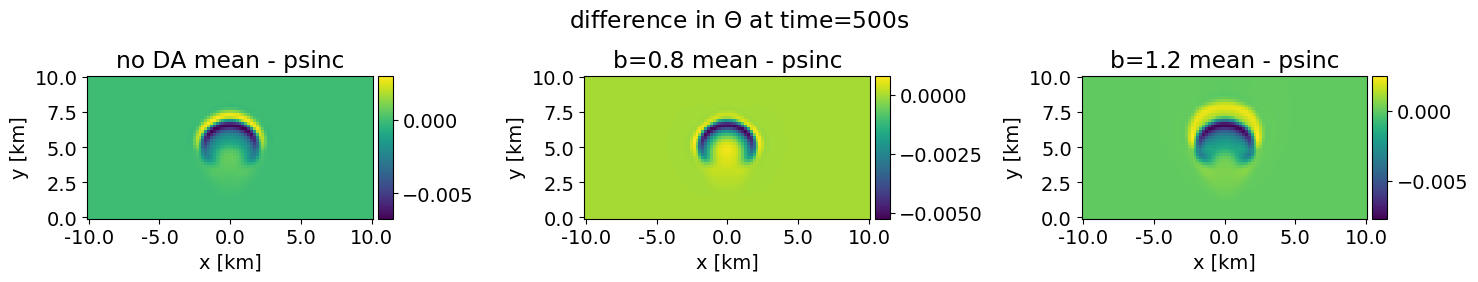

In [254]:
arr_lst = [[noda.mean - oo.Y,'no DA mean - psinc'], [b08.mean - oo.Y, 'b=0.8 mean - psinc'], [b12.mean - oo.Y, 'b=1.2 mean - psinc']]

fs = (15,3)
pl = pt.plotter(arr_lst,ncols=3,figsize=fs,sharey=False)
x_axs = np.arange(-10.0,15.0,5.0)
y_axs = np.arange(0,12.5,2.5)
x_loc = np.linspace(0,Nx-1,len(x_axs))
y_loc = np.linspace(0,Ny-1,len(y_axs))
x_label = r'x [km]'
y_label = r'y [km]'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)

st = 'difference in $\Theta$ at time=500s'
_ = pl.plot(aspect='equal',method='imshow', suptitle=st)
pl.save_fig('../img/mean_diffs', format='.pdf')

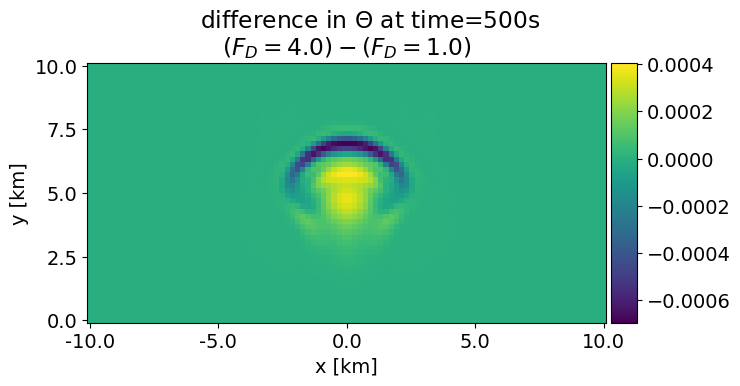

In [272]:
arr_lst = [[l40.mean - b08.mean,'$(F_D=4.0) - (F_D=1.0)$']]

fs = (8,4)
pl = pt.plotter(arr_lst,ncols=1,figsize=fs,sharey=False)
x_axs = np.arange(-10.0,15.0,5.0)
y_axs = np.arange(0,12.5,2.5)
x_loc = np.linspace(0,Nx-1,len(x_axs))
y_loc = np.linspace(0,Ny-1,len(y_axs))
x_label = r'x [km]'
y_label = r'y [km]'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)

st = 'difference in $\Theta$ at time=500s'
_ = pl.plot(aspect='equal',method='imshow', suptitle=st)
pl.save_fig('../img/loc_diffs', format='.pdf')